# This notebook produces Figs. 3,4,5 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from matplotlib.colors import LogNorm
import os
import re
from collections import defaultdict
import sys
sys.path.insert(0, "../../lib")  # add the library folder to the path I look for modules
import latexify
import networkx as nx

In [2]:
def new_color(ax):
    return next(ax._get_lines.prop_cycler)['color']

## Analysis of the results from dynamical cavity runs
This section load and combine the output files produced by the script `power.py`  to produce the figure shown in the paper.

Output from ```power.py``` are saved in pickle files with name `"theta_"+str(theta)+specifier+".pkl"`.
Multiple outputs at the same theta are saved with different unique identifiers.

In [3]:
def load_obj(theta,specifier=''):
    name='theta_'+str(theta)+specifier+'.pkl'
    with open('./data/dic-' + name , 'rb') as f:
        return pickle.load(f)
def load_and_hist(theta,specifier):
    dic = load_obj(theta,specifier)
    Ts = dic['Ts']
    data = dic['data']
    img = []
    for i in range(len(Ts)):
        h,b = np.histogram(data[i],bins = np.linspace(0,1,201),density=True)
        img+=[h]
    return img,b,Ts

filenames=os.listdir("./data")
pattern = re.compile("dic-theta_\d*\.\d+|\d.pkl")

dictnames=[name  for name in filenames if pattern.match(name)]# select only dictionary files
print(' Results are available in the files:')
for filename in dictnames:
    print(filename)

 Results are available in the files:
dic-theta_0.5.pkl
dic-theta_0.05.pkl
dic-theta_0.0.pkl
dic-theta_0.2.pkl


In [4]:
theta = 0.2
dic = load_obj(theta)
J = dic['J']
avg_degree = len(J.data) / J.shape[0]
img,b,Ts = load_and_hist(theta,'')
Ts = np.array(Ts)
img = np.array(img)



In [5]:
len(b),len(Ts)

(201, 202)

In [6]:
J_transpose = J.transpose().tolil()
js = J_transpose.rows  # list of list, structure is [el[i]] where el[i]
# is the list of  predecessors of gene i ( the index)
interaction = J_transpose.data  # list of list, structure is [el[i]]
# where el[i] is the list of  predecessors of gene i (interaction strength with sign)
Ks = np.array([len(neigh) for neigh in js])  # in degree of each gene
avg_degree = np.mean(Ks)
N = J.shape[0]
avg_degree 

1.87583

$$
\rho_{\pm} = \frac{1}{2}\left[ 1+P_j \tanh\frac{\beta(\pm J-\theta)}{2}-(1-P_j)\tanh\frac{\beta(\theta)}{2}\right]
$$

In [7]:
def plus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
def minus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))


<ipython-input-9-8c4bd45aa45b>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')


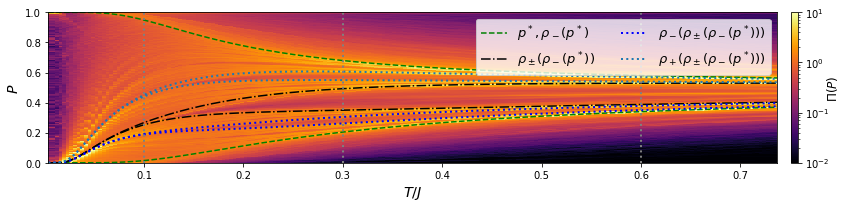

In [9]:
x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
#x is the solution of the fixed point plus(P) = P
Ts_rescaled =Ts/np.sqrt(avg_degree)
plt.figure(figsize = (13,3))
X,Y = np.meshgrid(Ts_rescaled,b)
plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')
cbar = plt.colorbar(pad = 0.015)
cbar.set_label("$\\Pi(P)$",rotation=90,fontsize=12,labelpad=-5)


plt.ylabel('$P$',fontsize = 14)
plt.xlabel('$T/J$',fontsize = 14.5)


#plt.plot(Ts,minus,'g:',label = '$1/2(1\pm tanh(\\beta J/2))$')
#plt.plot(Ts,minus*plus+minus/2,'--k')
plt.plot(Ts_rescaled,x,'g--')
plt.plot(Ts_rescaled,minus(x),'g--',label ='$p^*,\\rho_-(p^*)$')
plt.plot(Ts_rescaled,minus(minus(x)),'k-.')
plt.plot(Ts_rescaled,plus(minus(x)),'k-.',label ='$\\rho_\pm(\\rho_-(p^*))$')
plt.plot(Ts_rescaled,minus(plus(minus(x))),':',lw = 2,color = 'blue',label = '$\\rho_-(\\rho_\pm(\\rho_-(p^*)))$')
plt.plot(Ts_rescaled,minus(minus(minus(x))),':',lw = 2,color = 'blue')
ax = plt.gca()
c=new_color(ax)
plt.plot(Ts_rescaled,plus(plus(minus(x))),':',lw = 2,color = c,label = '$\\rho_+(\\rho_\pm(\\rho_-(p^*)))$')
plt.plot(Ts_rescaled,plus(minus(minus(x))),':',lw = 2,color = c)

plt.axvline(0.1,ls = ':',lw = 2,color = 'gray')
plt.axvline(0.3,ls = ':',lw = 2,color = 'gray')
plt.axvline(.6,ls = ':',lw = 2,color = 'gray')
plt.legend(fontsize = 13,ncol = 2)
plt.tight_layout()
#plt.title('$\\vartheta = $'+str(theta))
#plt.savefig('./figures/T_dependence_theta_'+str(theta)+'.pdf')



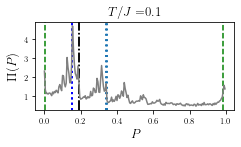

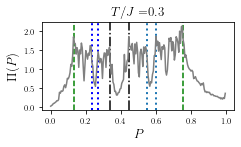

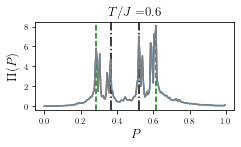

In [10]:
savefigure = True
latexify.latexify(columns = 2)
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts -0.1))])

#[plt.axvline(0.5**3*j,ymin=0.,ls = '--',c = 'm',alpha = 0.5) for j in range(9)]
p0 = 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts[i]))
plt.axvline(x[i],ls ='--',c='g')
plt.axvline(minus(x)[i],ls ='--',c='g')
plt.axvline(minus(minus(x))[i],ls ='-.',c='k')
plt.axvline(plus(minus(x))[i],ls ='-.',c='k')
plt.axvline(minus(plus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
plt.axvline(minus(minus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
ax = plt.gca()
c=new_color(ax)
plt.axvline(plus(plus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.axvline(plus(minus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.plot(b[:-1],img[i],label = '$\\tilde{T}=$'+str(round(Ts[i],1)),color = 'gray')
plt.title('$T/J=$'+str(round(Ts[i],1)),fontsize = 13)
#plt.axvline(plus(minus(minus(minus(x))))[i],ls = ':',color = 'brown',lw = 2)
#plt.axvline(plus(minus(minus(0)))[i],ls= ':',color = 'm')


plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
#plt.legend()
plt.tight_layout()
if savefigure:
    plt.savefig('./figures/theta_'+str(theta)+'_T_0.1.pdf')
plt.figure()

i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts -0.3))])

plt.axvline(x[i],ls ='--',c='g')
plt.axvline(minus(x)[i],ls ='--',c='g')
plt.axvline(minus(minus(x))[i],ls ='-.',c='k')
plt.axvline(plus(minus(x))[i],ls ='-.',c='k')
plt.axvline(minus(plus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)
plt.axvline(minus(minus(minus(x)))[i],ls = ':',color = 'blue',lw = 2)

ax = plt.gca()
c=new_color(ax)
plt.axvline(plus(plus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.axvline(plus(minus(minus(x)))[i],ls = ':',color = c,lw = 2)
plt.plot(b[:-1],img[i],label = '$\\tilde{T}=$'+str(round(Ts[i],1)),color = 'gray')
plt.title('$T/J=$'+str(round(Ts[i],1)),fontsize = 13)

#plt.axvline(plus(minus(1))[i],ls = ':',c='k')
#plt.legend(loc = 'lower right')
np.count_nonzero(J.data>0)/len(J.data),np.sort(img[i])[-2]/np.sort(img[i])[-1]
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
#plt.axvline((rho_minus)[i],ls = '-.',color = 'k',alpha = 0.7)
#plt.axvline((rho_plus)[i],ls = '-.',color = 'k',alpha = 0.7)
plt.tight_layout()
if savefigure:
    plt.savefig('./figures/theta_'+str(theta)+'_T_0.3.pdf')

plt.figure()


i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts -.6))])
plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)))
#plt.legend()
plt.axvline(x[i],ls ='--',c='g')
plt.axvline(minus(x)[i],ls ='--',c='g')
plt.axvline(minus(minus(x))[i],ls ='-.',c='k')
plt.axvline(plus(minus(x))[i],ls ='-.',c='k')
plt.plot(b[:-1],img[i],label = '$\\tilde{T}=$'+str(round(Ts[i],1)),color = 'gray')
plt.title('$T/J=$'+str(round(Ts[i],1)),fontsize = 13)
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
if savefigure:
    plt.savefig('./figures/theta_'+str(theta)+'_T_0.6.pdf')





## Fig. 4
Graphical solution of $\rho_{\pm}(P) = P$

In [ ]:
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts_rescaled -0.3))])

In [41]:
def plot_map_trj(f,xmin,repetition,**kwargs):
    ymin = 0
    ymax = f(xmin)
    xmax = ymax
    plt.arrow(xmin,(ymin+ymax)/2,0,0.05*(ymax-ymin)/np.abs(ymax-ymin),width = 0.01,length_includes_head=True,color=kwargs['color'])
    plt.arrow((xmin+xmax)/2,ymax,0.05*(xmax-xmin)/np.abs(xmax-xmin),0,width = 0.01,length_includes_head=True,color=kwargs['color'])

    for i in range(repetition):
        plt.vlines(xmin,ymin,ymax,**kwargs)
        plt.hlines(ymax,xmin,xmax,**kwargs)
        #plt.arrow((xmin+xmax)/2,ymin,0.1,0,width = 0.005,length_includes_head=True)
        xmin = ymax
        ymin = ymax
        ymax = f(xmin)
        xmax = ymax
        if i<1:
            plt.arrow(xmin,(ymin+ymax)/2,0,0.05*(ymax-ymin)/np.abs(ymax-ymin),width = 0.01,length_includes_head=True,color=kwargs['color'])
            plt.arrow((xmin+xmax)/2,ymax,0.05*(xmax-xmin)/np.abs(xmax-xmin),0,width = 0.01,length_includes_head=True,color=kwargs['color'])
def p(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/T)+P*(np.tanh((1-theta)/np.sqrt(avg_degree)/2/T)+np.tanh(theta/np.sqrt(avg_degree)/2/T)))
def m(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/T)+P*(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/T)+np.tanh(theta/np.sqrt(avg_degree)/2/T)))


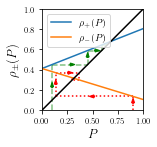

In [42]:
T = Ts[i]
t = np.linspace(0,1,100)
plt.plot(t,p(t),label = '$\\rho_+(P)$')
plt.plot(t,m(t),label = '$\\rho_-(P)$')
plt.plot(t,t,'k')
plt.legend(fontsize = 10)
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\rho_\pm(P)$',fontsize = 13)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plot_map_trj(p,0.1,3,ls = '--',alpha = 0.5,color = 'g')
plot_map_trj(m,0.9,4,ls = ':',color = 'r')
plt.xlim(0,1)
plt.ylim(0,1)
#plt.arrow((0.1),(0.5),0.4,0.4,width = 0.02,length_includes_head=True)
plt.tight_layout()
#plt.savefig('graphical_sol.pdf')

## Fig. 5

In [15]:


a = defaultdict(list)
for k,P in zip(Ks,dic['data'][i]):
    a[k].append(P)
x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))


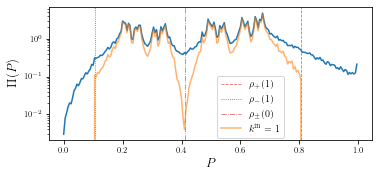

In [18]:
plt.figure(figsize=(5.3,2.5))
plt.axvline(plus(1)[i],ls = '--',alpha = 0.7,lw=0.8,c = '#d62728',label = '$\\rho_+(1)$')
plt.axvline(minus(1)[i],ls = ':',lw=0.8,c = '#d62728',label = '$\\rho_-(1)$')
plt.axvline(minus(0)[i],ls = '-.',alpha = 0.7,lw=0.8,c = '#d62728',label = '$\\rho_\pm(0)$')
h,b = np.histogram(dic['data'][i],bins =  np.linspace(0,1,201),density=True)
plt.plot(b[:-1],h)
#h,b = np.histogram(P,bins = 1000,density=False)
h1,b = np.histogram(a[1],bins = b,density=False)#node degree 1
plt.plot(b[:-1],h1/N/np.diff(b),'-',alpha =0.6,label = '$k^{\\mathrm{in}}=1$')
plt.legend(numpoints=1,fontsize = 10,ncol = 1,loc = 'upper left',bbox_to_anchor=(plus(1)[i]-0.3, 0.52))

plt.semilogy()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\Pi(P)$',fontsize = 13)
plt.tight_layout()
#plt.savefig('figures/degree_1.pdf')